<a href="https://colab.research.google.com/github/toanpham31231023715-cyber/toanpham.githhub.io/blob/main/3_1_3_B%C3%A0i_t%E1%BA%ADp_th%E1%BB%B1c_h%C3%A0nh_1_%2B_3_2_3_B%C3%A0i_t%E1%BA%ADp_th%E1%BB%B1c_h%C3%A0nh_1_Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -r requirements.txt

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
df = pd.read_csv('penguins.csv')
# Transform sex to 0's and 1's
df['sex'] = df['sex'].map({'Male': 1, "Female": 0})
df.info()
# Data for cluster, selecting only the numerical columns and dropping rows with missing values
X = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].dropna() # Ensure X remains a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                0 non-null      float64
dtypes: float64(5)
memory usage: 13.6 KB


In [ ]:
# We will create K-Means Models iteratively between k values of 3 to 10 and at each step, capture the Silhoutte Score and Inertia (Sum of Squared Distances)
km_inertias, km_scores = [], []
# Ensure X is a DataFrame and handle NaNs before the loop
X_cleaned = X.dropna()

for k in range(3, 10):
 km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_cleaned)
 km_inertias.append(km.inertia_)
 km_scores.append(silhouette_score(X_cleaned, km.labels_))
 print(f"Processing K-Means with k = {k}, Intertia = {km.inertia_}, Silhoutte Score = {silhouette_score(X_cleaned, km.labels_)}")
km_inertias

Processing K-Means with k = 3, Intertia = 52276602.19899711, Silhoutte Score = 0.5754231071354337
Processing K-Means with k = 4, Intertia = 29250714.17791382, Silhoutte Score = 0.5724290543958218
Processing K-Means with k = 5, Intertia = 16333665.346242344, Silhoutte Score = 0.5528966596074065
Processing K-Means with k = 6, Intertia = 11231866.871284448, Silhoutte Score = 0.5316931098036433
Processing K-Means with k = 7, Intertia = 8315139.260398121, Silhoutte Score = 0.5174104996334017
Processing K-Means with k = 8, Intertia = 6070854.379072631, Silhoutte Score = 0.5256339590380805
Processing K-Means with k = 9, Intertia = 4795852.697600378, Silhoutte Score = 0.5265287985143235


[52276602.19899711,
 29250714.17791382,
 16333665.346242344,
 11231866.871284448,
 8315139.260398121,
 6070854.379072631,
 4795852.697600378]

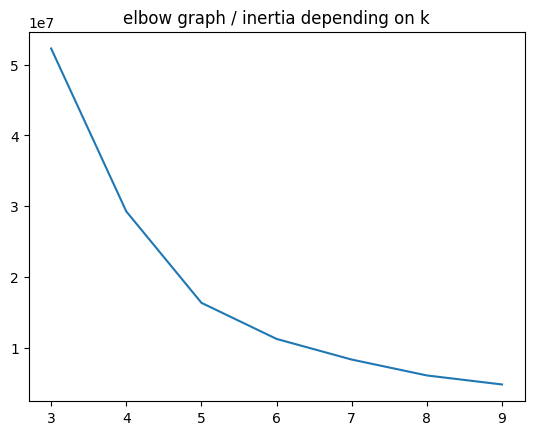

In [ ]:
# sns.lineplot(range(3, 10), km_inertias) PHUOCNT
sns.lineplot(x=range(3, 10), y=km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()

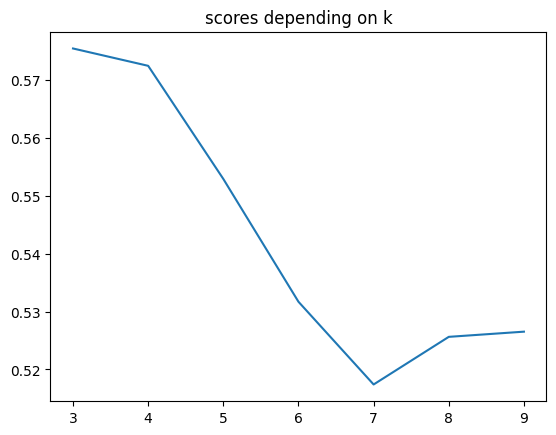

In [ ]:
sns.lineplot(x=range(3, 10), y=km_scores)
plt.title('scores depending on k')
plt.show()

In [ ]:
km = KMeans(n_clusters=6).fit(X)
#Assign the Cluster Labels to the Data
X['Label'] = km.labels_
#Info for each cluster
for k in range(6):
 print(f'Cluster nb : {k}')
 print(X[X.Label == k].describe().iloc[:, 1:-1])
 print('\n\n')

Cluster nb : 0
       culmen_depth_mm  flipper_length_mm  body_mass_g
count        47.000000          47.000000    47.000000
mean         15.065957         217.574468  5108.510638
std           0.901032           4.647321   185.205277
min          13.100000         207.000000  4850.000000
25%          14.500000         215.000000  4950.000000
50%          15.000000         217.000000  5100.000000
75%          15.700000         220.500000  5275.000000
max          17.300000         228.000000  5400.000000



Cluster nb : 1
       culmen_depth_mm  flipper_length_mm  body_mass_g
count        97.000000          97.000000    97.000000
mean         17.751546         188.556701  3322.422680
std           0.982780           6.032843   213.004442
min          15.500000         172.000000  2700.000000
25%          17.000000         185.000000  3200.000000
50%          17.800000         189.000000  3350.000000
75%          18.600000         193.000000  3500.000000
max          20.300000         2

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans # Corrected import
penguins = pd.read_csv("penguins.csv")
# penguins.drop('Id',inplace=True,axis=1) # Removed this line
# X = penguins.iloc[:,:-1].values #Set our training data # Removed this line
y = penguins.iloc[:,-1].values #"We'll use this just for visualization as clustering doesn't require labels" # Corrected comment
penguins.head().style.background_gradient(cmap
 =sns.cubehelix_palette(as_cmap=True))

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.100000,18.700000,181.000000,3750.000000,MALE
1,39.500000,17.400000,186.000000,3800.000000,FEMALE
2,40.300000,18.000000,195.000000,3250.000000,FEMALE
3,nan,nan,nan,nan,nan
4,36.700000,19.300000,193.000000,3450.000000,FEMALE


In [ ]:
# Data Distribution => The Data is perfectly balanced
fig = px.pie(penguins,
'sex',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],title=
'Data Distribution',template='plotly')
fig.show()
# Phân tích biến Sepal-Length với box-plot
fig = px.box(data_frame=penguins, x='sex',y='culmen_length_mm',
 color='sex',
 color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'],
 orientation='v')
fig.show()
# Phân tích biến SepalLengthCm với histogram
fig = px.histogram(data_frame=penguins, x='culmen_length_mm',
 color='sex',
 color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],
 nbins=50)
fig.show()
# Phân tích biến SepalWidth với box plot
fig = px.box(data_frame=penguins, x='sex',
 y='culmen_depth_mm', color='sex',
 color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'],
 orientation='v')
fig.show()
# Phân tích 2 biến SepalLengthCm và SepalWidthCm
# Remove rows where 'flipper_length_mm' is negative
penguins_cleaned = penguins[penguins['flipper_length_mm'] >= 0].copy()

fig = px.scatter(data_frame=penguins_cleaned, x='culmen_length_mm',y='culmen_depth_mm'
 ,color='sex',size='flipper_length_mm',
 template='seaborn',
 color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],)
fig.update_layout(width=800, height=600,
 xaxis=dict(color="#BF40BF"),
 yaxis=dict(color="#BF40BF"))
fig.show()
# Phân tích 2 biến PetalLengthCm và PetalWidthCm
fig = px.scatter(data_frame=penguins_cleaned, x='flipper_length_mm',y='body_mass_g'
 ,color='sex',size='culmen_length_mm',
 template='seaborn',
 color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],)
fig.update_layout(width=800, height=600,
 xaxis=dict(color="#BF40BF"),
 yaxis=dict(color="#BF40BF"))
fig.show()

In [ ]:
sse = []
for i in range(1,9):
 kmeans = KMeans(n_clusters=i , max_iter=300, n_init=10) # Added n_init to avoid warning
 kmeans.fit(X.dropna()) # Added .dropna() here
 sse.append(kmeans.inertia_)
fig = px.line(y=sse,template="seaborn",title='Eblow Method')
fig.update_layout(width=800, height=600,
title_font_color="#BF40BF",
xaxis=dict(color="#BF40BF",title="Clusters"),
yaxis=dict(color="#BF40BF",title="SSE"))
# Cluster = 3 là số cluster tối ưu cho dữ liệu Penguins
fig.show() # Added fig.show() to display the plot

In [ ]:
kmeans = KMeans(n_clusters = 3,
 init = 'k-means++',
 max_iter = 300, n_init = 10, random_state = 0)
clusters = kmeans.fit_predict(X)

In [ ]:
fig = go.Figure()
# Assuming X_cleaned is the DataFrame used for clustering and has columns 'culmen_length_mm' and 'culmen_depth_mm' or similar
# Replace with appropriate column names for plotting the clusters
x_col = 'culmen_length_mm' # Example column name
y_col = 'culmen_depth_mm' # Example column name

fig.add_trace(go.Scatter(
 x=X_cleaned.loc[clusters == 0, x_col], y=X_cleaned.loc[clusters == 0, y_col],
 mode='markers',marker_color='#DB4CB2',name='Cluster 0' # Changed name
))
fig.add_trace(go.Scatter( # Corrected typo g.add_trace to fig.add_trace
 x=X_cleaned.loc[clusters == 1, x_col], y=X_cleaned.loc[clusters == 1, y_col],
 mode='markers',marker_color='#c9e9f6',name='Cluster 1' # Changed name
))
fig.add_trace(go.Scatter(
 x=X_cleaned.loc[clusters == 2, x_col], y=X_cleaned.loc[clusters == 2, y_col],
 mode='markers',marker_color='#7D3AC1',name='Cluster 2' # Changed name
))
fig.add_trace(go.Scatter(
 x=kmeans.cluster_centers_[:, 0], y= kmeans.cluster_centers_[:,1],
 mode='markers',marker_color='#CAC9CD',marker_symbol=4,
marker_size=13,name='Centroids'
))
fig.update_layout(template='plotly_dark',width=1000,
height=500,title='Kmean Clustering Results')
fig.show() # Added fig.show() to display the plot

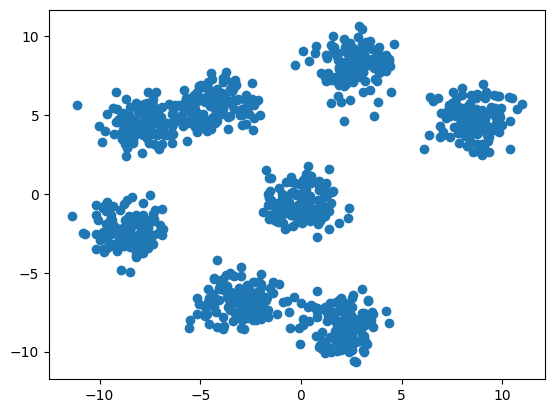

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
# Generate a random cluster dataset to experiment on. X = coordinate
# points, y = cluster labels (not needed)
X, y = make_blobs(n_samples=1000, centers=8, n_features=2,
random_state=800)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [ ]:
# Generate distance matrix with 'linkage' function
distances = linkage(X, method="centroid", metric="euclidean")
print(distances)

[[5.72000000e+02 7.62000000e+02 7.69412624e-03 2.00000000e+00]
 [3.00000000e+01 1.96000000e+02 8.87881891e-03 2.00000000e+00]
 [5.91000000e+02 8.70000000e+02 1.07476240e-02 2.00000000e+00]
 ...
 [1.98900000e+03 1.99200000e+03 7.81168528e+00 3.75000000e+02]
 [1.99500000e+03 1.99600000e+03 1.02408477e+01 7.50000000e+02]
 [1.99400000e+03 1.99700000e+03 1.20025814e+01 1.00000000e+03]]


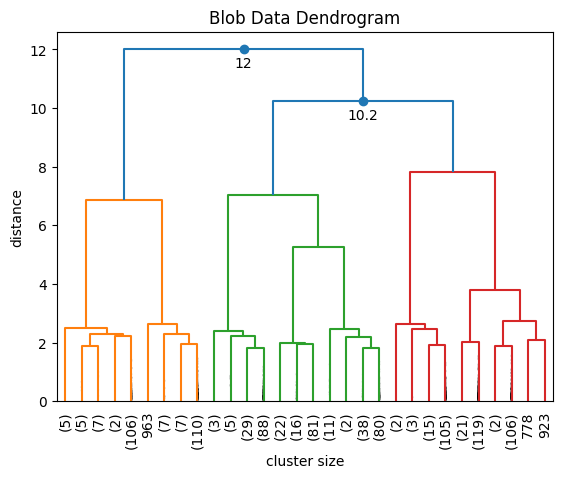

In [ ]:
# Take normal dendrogram output and stylize in cleaner way
def annotated_dendrogram(*args, **kwargs):
 # Standard dendrogram from SciPy
 scipy_dendro = dendrogram(*args, truncate_mode='lastp',
 show_contracted=True,leaf_rotation=90.)
 plt.title('Blob Data Dendrogram')
 plt.xlabel('cluster size')
 plt.ylabel('distance')
 for i, d, c in zip(scipy_dendro['icoord'], scipy_dendro['dcoord'],
 scipy_dendro['color_list']):
  x = 0.5 * sum(i[1:3])
  y = d[1]
  if y > 10:
   plt.plot(x, y, 'o', c=c)
   plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
   textcoords='offset points',
   va='top', ha='center')
 return scipy_dendro
dn = annotated_dendrogram(distances)
plt.show()

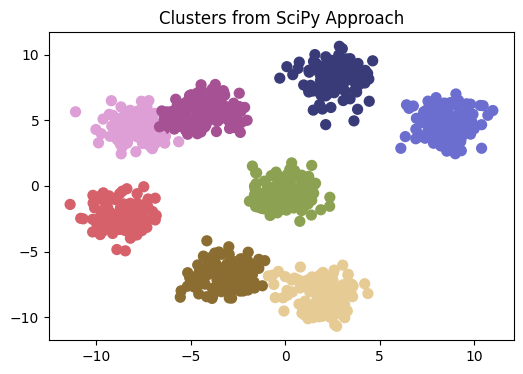

In [ ]:
scipy_clusters = fcluster(distances, 3, criterion="distance")
plt.figure(figsize=(6,4))
plt.title("Clusters from SciPy Approach")
plt.scatter(X[:, 0], X[:, 1], c = scipy_clusters ,s=50, cmap='tab20b')
plt.show()

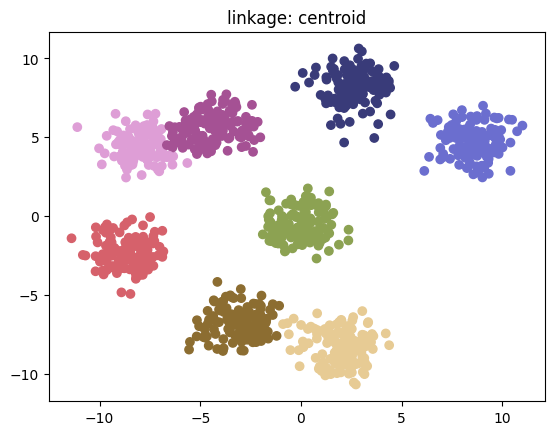

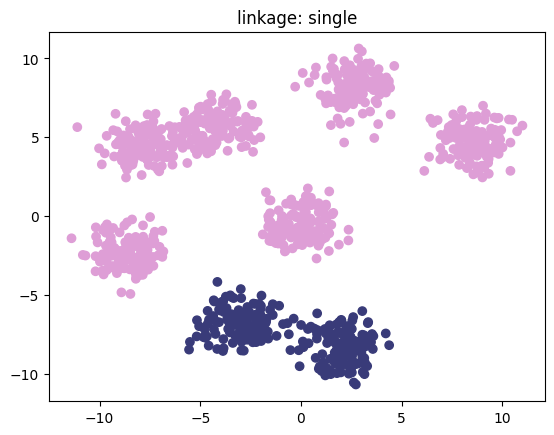

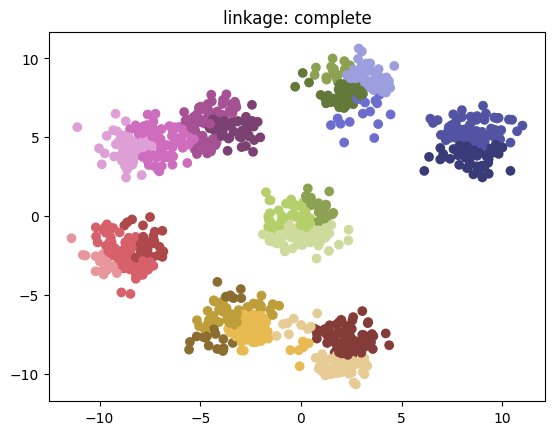

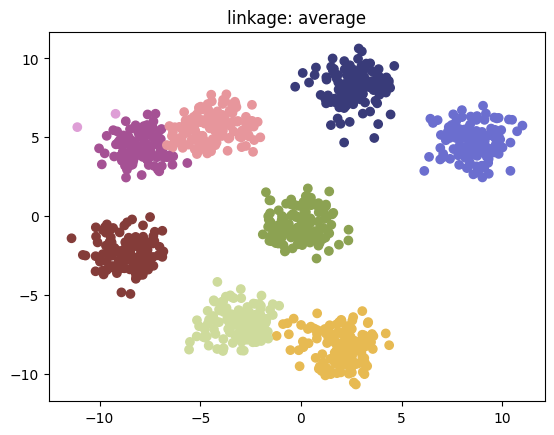

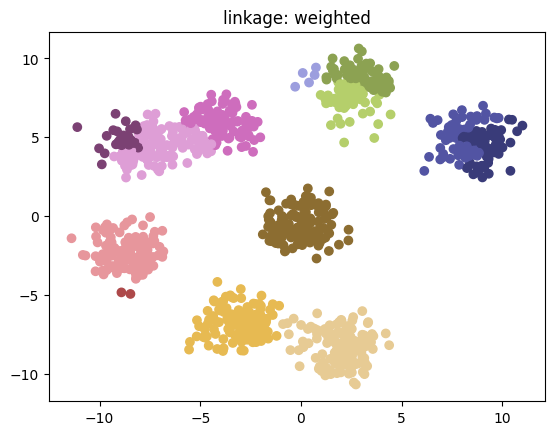

In [ ]:
methods = ['centroid', 'single', 'complete', 'average', 'weighted']
for method in methods:
 distances = linkage(X, method=method, metric="euclidean")
 clusters = fcluster(distances, 3, criterion="distance")
 plt.title('linkage: ' + method)
 plt.scatter(X[:,0], X[:,1], c=clusters, cmap='tab20b')
 plt.show()

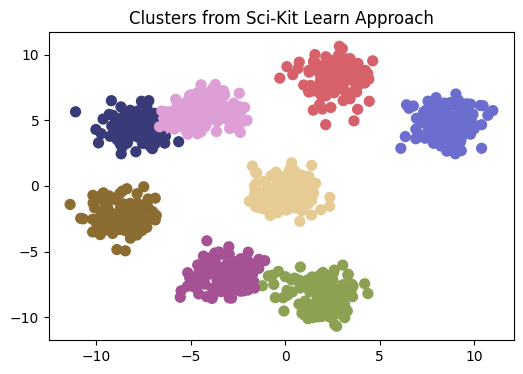

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
ac = AgglomerativeClustering(n_clusters = 8, linkage="average")
#distances = linkage(X, method="centroid", metric="euclidean")
sklearn_clusters = ac.fit_predict(X)
scipy_clusters = fcluster(distances, 3, criterion="distance")
plt.figure(figsize=(6,4))
plt.title("Clusters from Sci-Kit Learn Approach")
plt.scatter(X[:, 0], X[:, 1], c = sklearn_clusters ,s=50, cmap='tab20b')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
wine_df = pd.read_csv("penguins.csv")

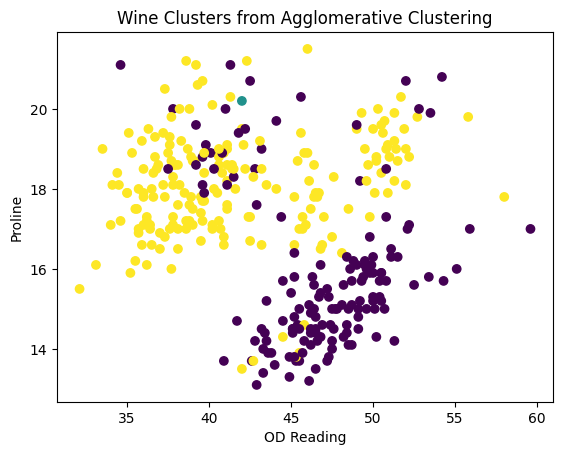

In [ ]:
ac = AgglomerativeClustering(3, linkage='average')
# Drop the 'sex' column as it is not numerical
ac_clusters = ac.fit_predict(wine_df.drop('sex', axis=1).dropna())
# Hiển thị các cụm sau khi phân cấp theo cách tiếp cận của scikit-learn
plt.scatter(wine_df.drop('sex', axis=1).dropna().values[:,0], wine_df.drop('sex', axis=1).dropna().values[:,1], c=ac_clusters)
plt.title("Wine Clusters from Agglomerative Clustering")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

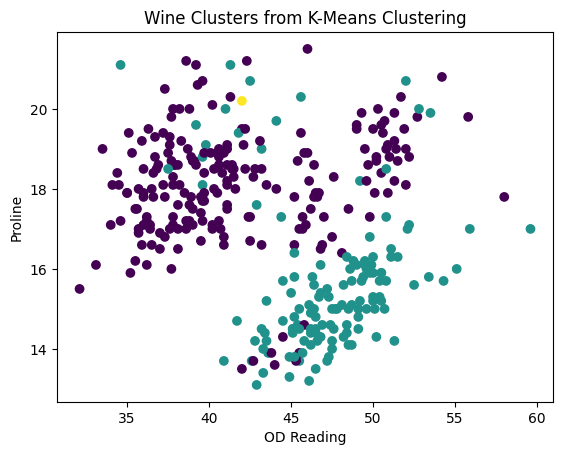

In [ ]:
km = KMeans(3)
# Drop the 'sex' column as it is not numerical and handle missing values
km_clusters = km.fit_predict(wine_df.drop('sex', axis=1).dropna())
# Hiển thị kết quả sau khi phân cụm K-mean
plt.scatter(wine_df.drop('sex', axis=1).dropna().values[:,0], wine_df.drop('sex', axis=1).dropna().values[:,1], c=km_clusters)
plt.title("Wine Clusters from K-Means Clustering")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

In [ ]:
# Calculate Silhouette Scores
print("Silhouette Scores for Penguins Dataset:\n")
# Drop the 'sex' column and handle missing values before calculating the silhouette score
print("K-Means Clustering: ", silhouette_score(wine_df.drop('sex', axis=1).dropna(), km_clusters))
print("Agg Clustering: ", silhouette_score(wine_df.drop('sex', axis=1).dropna(), ac_clusters))

Silhouette Scores for Penguins Dataset:

K-Means Clustering:  0.6290854079024094
Agg Clustering:  0.6214132045606489
